In [ ]:
!pip install pandas numpy lightgbm seaborn matplotlib scikit-learn imbalanced-learn geopy joblib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import joblib

In [7]:
!curl -L -o "paysim1.zip" https://www.kaggle.com/api/v1/datasets/download/ealaxi/paysim1


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  177M    0 33715    0     0  23195      0  2:13:55  0:00:01  2:13:54 23195
  0  177M    0  327k    0     0   137k      0  0:22:04  0:00:02  0:22:02  316k
  2  177M    2 5197k    0     0  1535k      0  0:01:58  0:00:03  0:01:55 2671k
 11  177M   11 20.9M    0     0  4898k      0  0:00:37  0:00:04  0:00:33 7314k
 20  177M   20 36.7M    0     0  6937k      0  0:00:26  0:00:05  0:00:21 9470k
 29  177M   29 52.1M    0     0  8265k      0  0:00:22  0:00:06  0:00:16 10.4M
 37  177M   37 67.1M    0     0  9305k      0  0:00:19  0:00:07  0:00:12 13.3M
 47  177M   47 83.9M    0     0  10.0M      0  0:0

In [8]:
import zipfile

with zipfile.ZipFile("paysim1.zip", "r") as zip_ref:
    zip_ref.extractall(".")  # Extracts to the current directory

print("Extraction complete!")


Extraction complete!


In [9]:
# import os

# # Find the first CSV file in the directory
# csv_file = next((f for f in os.listdir(".") if f.endswith(".csv")), None)

# if csv_file:
#     df = pd.read_csv(csv_file)  # Load into a DataFrame
#     print(f"Loaded {csv_file} successfully!")
# else:
#     print("No CSV file found!")

In [10]:
# df = pd.read_csv(csv_file)
# df.head()


In [11]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
print(df.head()) 


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [12]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

isFraud
0    6354407
1       8213
Name: count, dtype: int64


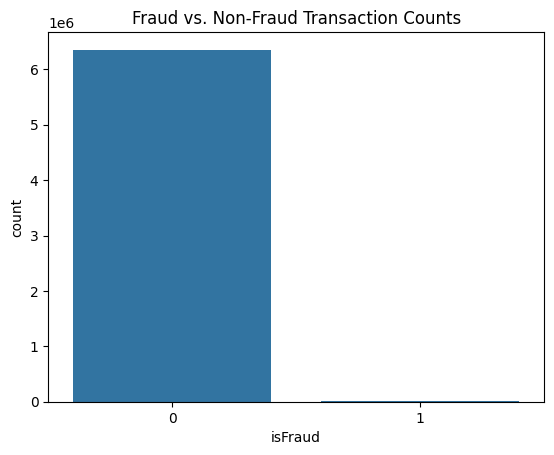

In [13]:
# Count fraud vs. non-fraud transactions
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs. Non-Fraud Transaction Counts')
plt.show()


type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


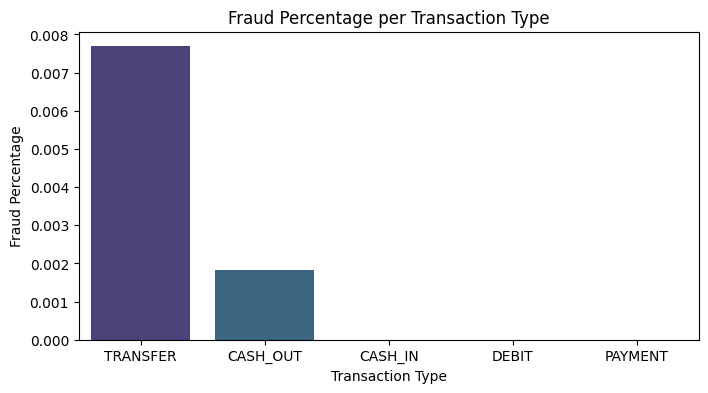

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate fraud percentage per transaction type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print(fraud_by_type)

# Plotting fraud percentage per transaction type
plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, hue=fraud_by_type.index, palette="viridis", dodge=False, legend=False)
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Percentage")
plt.title("Fraud Percentage per Transaction Type")
plt.show()


# Data Preprocessing

In [15]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [16]:
# Convert 'type' to numerical values
encoder = LabelEncoder()
df["type"] = encoder.fit_transform(df["type"])

In [17]:
from imblearn.over_sampling import SMOTE

x=df.drop(['isFraud'],axis=1)
y=df['isFraud']


smote = SMOTE(random_state=42)
x_resample, y_resample = smote.fit_resample(x, y)

isFraud
0    6354407
1    6354407
Name: count, dtype: int64


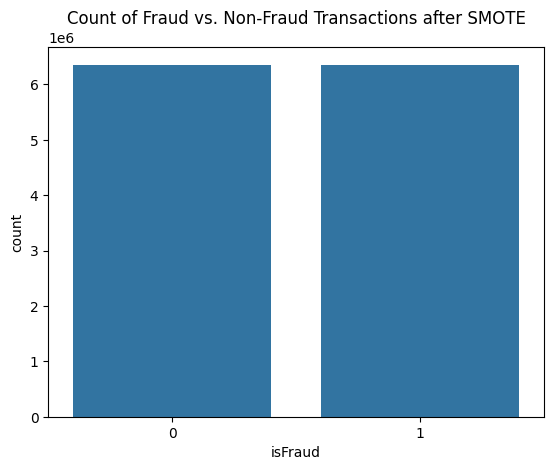

In [18]:
# Count fraud vs. non-fraud transactions after applying SMOTE
fraud_counts = y_resample.value_counts()
print(fraud_counts)

sns.countplot(x=y_resample)
plt.title('Count of Fraud vs. Non-Fraud Transactions after SMOTE')
plt.show()


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample, test_size=0.2, random_state=42)

In [20]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier (
  boosting_type='gbdt',
  objective='binary',
  metrics = 'auc',
  is_unbalance = True,
  learning_rate=0.05,
  num_leaves=31,
  max_depth=1,
  n_estimators=200
)
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 5083481, number of negative: 5083570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 10167051, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499996 -> initscore=-0.000018
[LightGBM] [Info] Start training from score -0.000018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(is_unbalance=True, learning_rate=0.05, max_depth=1,
               metrics='auc', n_estimators=200, objective='binary')

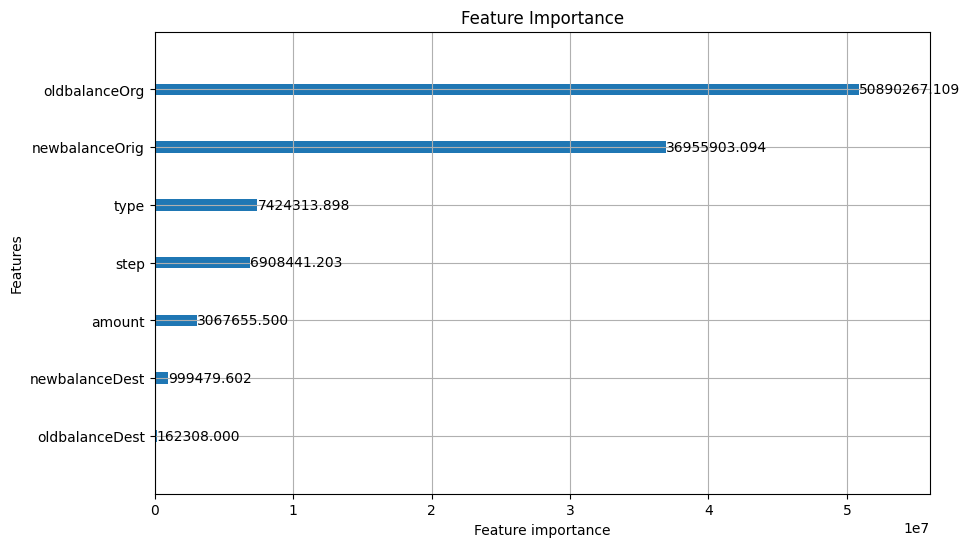

In [27]:
lgb.plot_importance(lgb_model, importance_type='gain', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

Classification_Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94   1270837
           1       0.94      0.94      0.94   1270926

    accuracy                           0.94   2541763
   macro avg       0.94      0.94      0.94   2541763
weighted avg       0.94      0.94      0.94   2541763

Roc AUC Score:  0.986081164036748


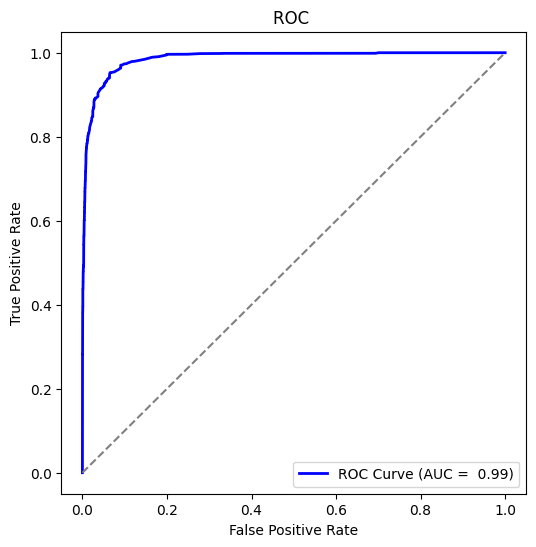

In [38]:
y_pred = lgb_model.predict(x_test)
print("Classification_Report: \n", classification_report (y_test,y_pred))
y_probs = lgb_model.predict_proba(x_test)[:, 1]
print("Roc AUC Score: ", roc_auc_score(y_test, y_probs))
fpr, tpr, thresholds = roc_curve (y_test, lgb_model.predict_proba (x_test) [:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc: .2f})')
plt.plot([0,1],[0,1], color='gray', linestyle= '--')
plt.title('ROC ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

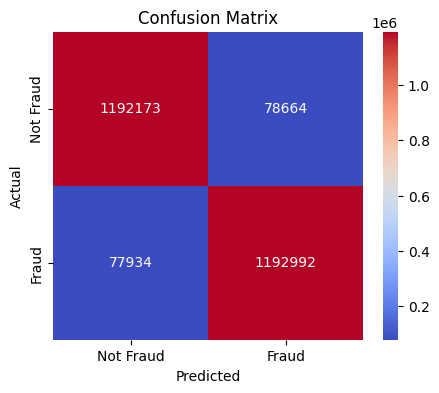

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [31]:
y_probs = lgb_model.predict_proba(x_test)[:, 1]  # Probabilities of being fraud
threshold = 0.3
y_pred_new = (y_probs > threshold).astype(int)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91   1270837
           1       0.86      0.99      0.92   1270926

    accuracy                           0.91   2541763
   macro avg       0.92      0.91      0.91   2541763
weighted avg       0.92      0.91      0.91   2541763



In [32]:
joblib.dump(lgb_model, "lgb.jb")
joblib.dump(encoder, "label_encoder.jb")

['label_encoder.jb']

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, verbose=1, random_state=42)
x_train_sample = x_train.sample(frac=0.5, random_state=42)  # Use 50% of the data
y_train_sample = y_train.loc[x_train_sample.index]
random_forest_model.fit(x_train_sample, y_train_sample)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42, verbose=1)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    2.4s finished


Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270837
           1       0.98      1.00      0.99   1270926

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    2.5s finished


Roc AUC Score:  0.9993659767826469


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    2.3s finished


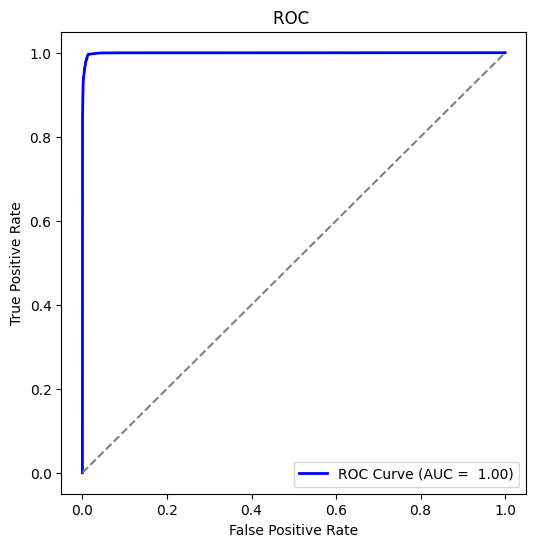

In [35]:
y_pred = random_forest_model.predict(x_test)
print("Classification_Report: \n", classification_report (y_test,y_pred))
y_probs = random_forest_model.predict_proba(x_test)[:, 1]
print("Roc AUC Score: ", roc_auc_score(y_test, y_probs))
fpr, tpr, thresholds = roc_curve (y_test, random_forest_model.predict_proba (x_test) [:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc: .2f})')
plt.plot([0,1],[0,1], color='gray', linestyle= '--')
plt.title('ROC ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

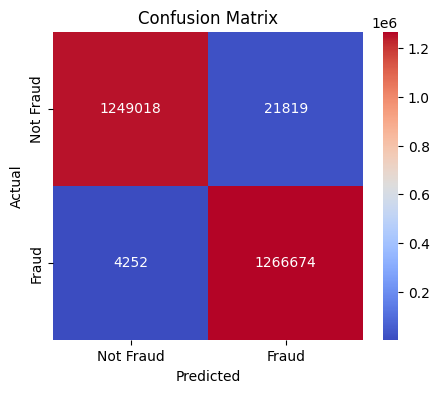

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## XGBoost

In [41]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 10.7 MB/s eta 0:00:12
   -- ------------------------------------- 6.6/124.9 MB 21.3 MB/s eta 0:00:06
   --- ------------------------------------ 12.3/124.9 MB 23.9 MB/s eta 0:00:05
   ----- ---------------------------------- 17.8/124.9 MB 25.2 MB/s eta 0:00:05
   ------- -------------------------------- 23.3/124.9 MB 25.4 MB/s eta 0:00:04
   --------- ------------------------------ 29.4/124.9 MB 26.1 MB/s eta 0:00:04
   ----------- ---------------------------- 35.4/124.9 MB 26.7 MB/s eta 0:00:04
   ------------- -------------------------- 41.4/124.9 MB 27.1 MB/s eta 0:00:04
   --------------- ------------------------ 47.7/124.9 MB 27.5 MB/s eta 0:00:03
   ----------------- ---------------------- 54.0/124.9 MB 27.7 MB/s eta 0:00:03
   ------------------- -------------------- 60.0/124.9 MB 27.9 MB/s eta 0:00:03
   --------------------- ------------------ 65.8/12

In [44]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(x_train, y_train)

c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:07:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763

Roc AUC Score:  0.9999667226251888


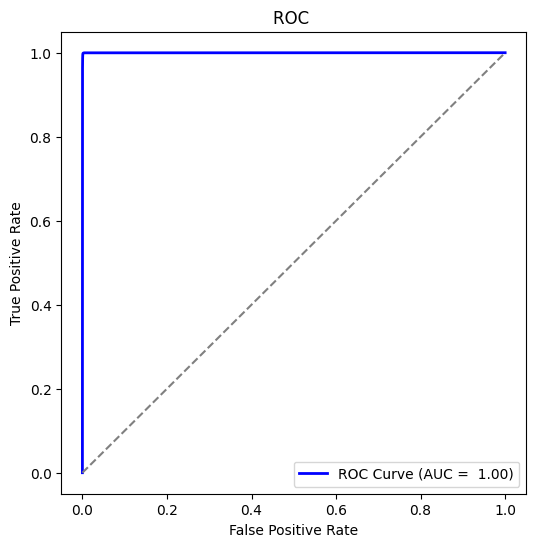

In [46]:
y_pred = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred))

y_probs = xgb_model.predict_proba(x_test)[:, 1]
print("Roc AUC Score: ", roc_auc_score(y_test, y_probs))
fpr, tpr, thresholds = roc_curve (y_test, xgb_model.predict_proba (x_test) [:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc: .2f})')
plt.plot([0,1],[0,1], color='gray', linestyle= '--')
plt.title('ROC ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [48]:
train_acc = xgb_model.score(x_train, y_train)
test_acc = xgb_model.score(x_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9985
Test Accuracy: 0.9985


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, x_resample,y_resample, cv=5, scoring='accuracy')

print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}") # Mean of the cross-validation scores

c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:36:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:39

Cross-validation Accuracy Scores: [0.54669416 0.86010419 0.89364469 0.95450756 0.5293391 ]
Mean Accuracy: 0.7569


In [53]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,   
    max_depth=4,        
    learning_rate=0.05, # Reduce for better generalization
    reg_alpha=0.1,      # L1 regularization
    reg_lambda=0.5,     # L2 regularization
    subsample=0.8,      # Randomly drop data
    colsample_bytree=0.8, # Use only 80% of features per tree
    use_label_encoder=False, eval_metric="logloss"
)
xgb_model.fit(x_train, y_train)

c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:57:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [54]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, x_resample,y_resample, cv=5, scoring='accuracy')

print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}") # Mean of the cross-validation scores

c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:59:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:01:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:02:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Codes\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:04

Cross-validation Accuracy Scores: [0.67057314 0.97784294 0.98797685 0.9840945  0.52083043]
Mean Accuracy: 0.8283
